In [1]:
!pip install gensim tensorflow numpy pandas scikit-learn matplotlib seaborn

In [2]:
import gensim
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dropout, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/a1/arabic_reviews.csv')

# Show some rows to ensure dataset is correctly loaded
print("Sample Data:")
print(df.head())

# Check class balance
print("Class Distribution:")
print(df['label'].value_counts())

Sample Data:
      label                                               text
0  Positive  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1  Positive  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2  Positive  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3  Positive  خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4  Positive  ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
Class Distribution:
label
Positive    33333
Mixed       33333
Negative    33333
Name: count, dtype: int64


      label                                               text
0  Positive  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1  Positive  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2  Positive  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3  Positive  خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4  Positive  ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


<ipython-input-4-3c014d0a1fdc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


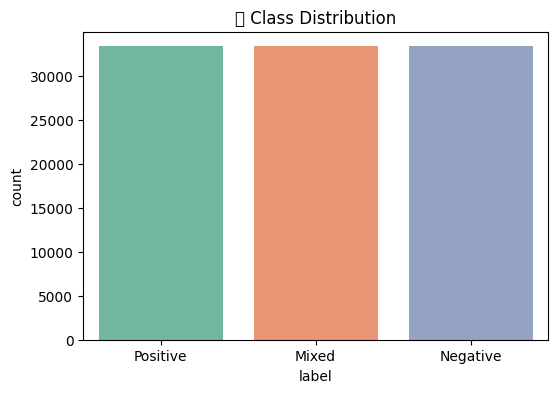

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check first few rows
print(df.head())

# Check label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], palette="Set2")
plt.title("🔹 Class Distribution")
plt.show()


In [5]:
!pip install arabic-reshaper

In [6]:
!pip install tashaphyne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 12.4 MB/s eta 0:00:00


In [7]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
import re
import arabic_reshaper
from tashaphyne.stemming import ArabicLightStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Arabic stopwords list
stop_words = set(stopwords.words("arabic"))

def clean_text(text):
    # Normalize Arabic letters
    text = re.sub(r"[إأآا]", "ا", text)
    text = re.sub(r"ى", "ي", text)
    text = re.sub(r"ؤ", "و", text)
    text = re.sub(r"ئ", "ي", text)
    text = re.sub(r"ة", "ه", text)

    # Remove punctuation and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)

    # Tokenize and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    return " ".join(words)

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Show cleaned samples
print(df[['text', 'clean_text']].head())

                                                text  \
0  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...   
1  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...   
2  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...   
3  خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...   
4  ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...   

                                          clean_text  
0  ممتاز نوعا النظافه والموقع والتجهيز والشاطيء ا...  
1  احد اسباب نجاح الامارات ان شخص الدوله يعشق ترا...  
2  هادفه وقويه تنقلك صخب شوارع القاهره الي هدوء ج...  
3  خلصنا مبدييا اللي مستني ابهار زي الفيل الازرق ...  
4  ياسات جلوريا جزء يتجزا دبي فندق متكامل الخدمات...  


In [9]:
from gensim.models import KeyedVectors

In [10]:
import os
import shutil  # For deleting folders if needed
from zipfile import ZipFile  # Importing ZipFile to handle zip files

In [12]:
# Define paths
zip_path = "/content/drive/MyDrive/a1/Twt-CBOW.zip"
extract_folder = "/content/aravec_model"
model_path = os.path.join(extract_folder, "Twt-CBOW")

# Check if already unzipped, if not then unzip
if not os.path.exists(model_path):
    print("Unzipping AraVec embeddings...")
    # Remove any previously unzipped folder to prevent conflicts
    if os.path.exists(extract_folder):
        !rm -rf {extract_folder}

    # Unzipping
    os.makedirs(extract_folder, exist_ok=True)
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print("Successfully unzipped!")
else:
    print("AraVec embeddings already extracted.")

Unzipping AraVec embeddings...
Successfully unzipped!


In [13]:
# Check the extracted folder contents
extracted_files = os.listdir("/content/aravec_model")
print(extracted_files)

['Twt-CBOW', 'Twt-CBOW.wv.syn0.npy', 'Twt-CBOW.syn1neg.npy']


In [14]:
import os
print(os.path.exists("/content/aravec_model/Twt-CBOW"))  # Should print True

True


In [15]:
print(os.listdir("/content/aravec_model"))

['Twt-CBOW', 'Twt-CBOW.wv.syn0.npy', 'Twt-CBOW.syn1neg.npy']


In [16]:
#!mv /content/aravec_model/Twt-CBOW /content/aravec_model/Twt-CBOW.bin

In [18]:
from gensim.models import KeyedVectors
import os

# Assuming you extracted the AraVec model to '/content/aravec_model'
model_file = "/content/aravec_model/Twt-CBOW"
# model_file = "Twt-CBOW"

#aravec_path = os.path.join(model_folder, model_file)

# Load the AraVec model
#aravec = KeyedVectors.load_word2vec_format(model_file, binary=False, encoding='utf8', unicode_errors='replace')
aravec = gensim.models.Word2Vec.load(model_file)
# Tokenize words and prepare embedding matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Tokenize dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_text'])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding

# Create embedding matrix
embedding_dim = 300  # AraVec uses 300-dimensional embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in aravec.wv:
        embedding_matrix[i] = aravec.wv[word]

print(f"✅ Loaded AraVec embeddings for {len(embedding_matrix)} words.")


✅ Loaded AraVec embeddings for 282203 words.


In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Encode labels (Negative = 0, Mixed = 1, Positive = 2)
label_mapping = {'Negative': 0, 'Mixed': 1, 'Positive': 2}
df['label_id'] = df['label'].map(label_mapping)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label_id'], test_size=0.1, random_state=42, stratify=df['label_id']
)

# Convert text to sequences
max_length = 100  # Adjust as needed
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding='post')

# Convert labels to categorical (for softmax)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print("✅ Data successfully prepared for training.")

✅ Data successfully prepared for training.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh')),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dense(3, activation='softmax')  # 3 output classes
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_data=(X_test_seq, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.6165 - loss: 0.8009 - val_accuracy: 0.6790 - val_loss: 0.7005
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6918 - loss: 0.6781 - val_accuracy: 0.6858 - val_loss: 0.6774
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7218 - loss: 0.6188 - val_accuracy: 0.6912 - val_loss: 0.6843
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7548 - loss: 0.5607 - val_accuracy: 0.6804 - val_loss: 0.7131
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.7859 - loss: 0.5009 - val_accuracy: 0.6772 - val_loss: 0.7573
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8207 - loss: 0.4344 - val_accuracy: 0.6724 - val_loss: 0.7985
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8530 - loss: 0.3653 - val_accuracy: 0.6694 - val_loss: 0.8818
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.8756 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       0.69      0.73      0.71      3333
       Mixed       0.58      0.57      0.58      3333
    Positive       0.71      0.69      0.70      3334

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



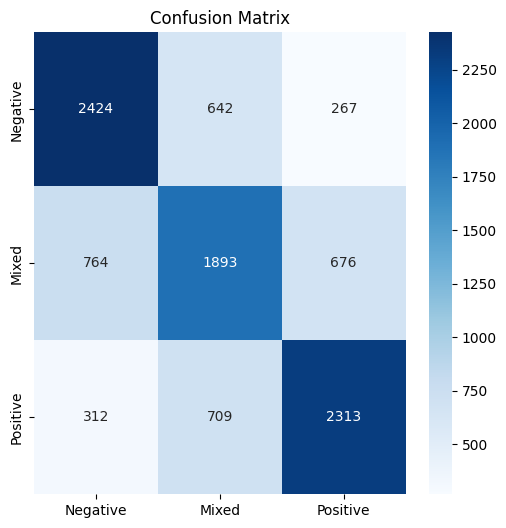

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict on test set
y_pred = np.argmax(model.predict(X_test_seq), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Negative', 'Mixed', 'Positive']))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Mixed', 'Positive'], yticklabels=['Negative', 'Mixed', 'Positive'])
plt.title("Confusion Matrix")
plt.show()

In [25]:
new_sentences = ["الخدمة كانت رائعة جدا", "التجربة كانت سيئة للغاية", "كان الموضوع عادياً تماماً"]
new_sequences = pad_sequences(tokenizer.texts_to_sequences(new_sentences), maxlen=max_length, padding='post')

predictions = np.argmax(model.predict(new_sequences), axis=1)
label_map = {0: "سلبي", 1: "مختلط", 2: "إيجابي"}
print("Predictions:", [label_map[p] for p in predictions])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predictions: ['مختلط', 'سلبي', 'مختلط']
